In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import mapclassify as mc
import seaborn as sns
import numpy as np
from mapclassify import NaturalBreaks

In [2]:
muni = gpd.read_file('data2/Муниципальные_образования_верхнего_уровня_России.shp')
muni = muni[muni['fo'] == 'Уральский']
muni.head()

,db_j4c1v_h,oktmo,oktmo_num,region,type,name,admcen,note,fo,pop,rur,urb,st_area_sh,st_length_,geometry
713,920,37620000,37620000,Курганская область,муниципальный район,Макушинский муниципальный район,г Макушино,None,Уральский,14645,6965,7680,1.064615e+10,583250.125477,"POLYGON ((7526536.061 7430982.893, 7526614.074..."
735,923,37626000,37626000,Курганская область,муниципальный район,Петуховский муниципальный район,г Петухово,None,Уральский,16267,6351,9916,8.479254e+09,631957.763359,"POLYGON ((7648619.278 7429711.402, 7650138.466..."
791,924,37628000,37628000,Курганская область,муниципальный район,Половинский муниципальный район,с Половинное,None,Уральский,10031,10031,0,8.217772e+09,539159.169037,"POLYGON ((7366761.3 7379725.375, 7366485.161 7..."
913,910,37602000,37602000,Курганская область,муниципальный район,Альменевский муниципальный район,с Альменево,None,Уральский,9128,9128,0,7.496168e+09,492233.277344,"POLYGON ((7088548.792 7385759.154, 7088949.351..."
960,911,37604000,37604000,Курганская область,муниципальный район,Белозерский муниципальный район,с Белозерское,None,Уральский,14476,14476,0,1.088320e+10,543222.177072,"POLYGON ((7308766.606 7612654.695, 7311811.828..."


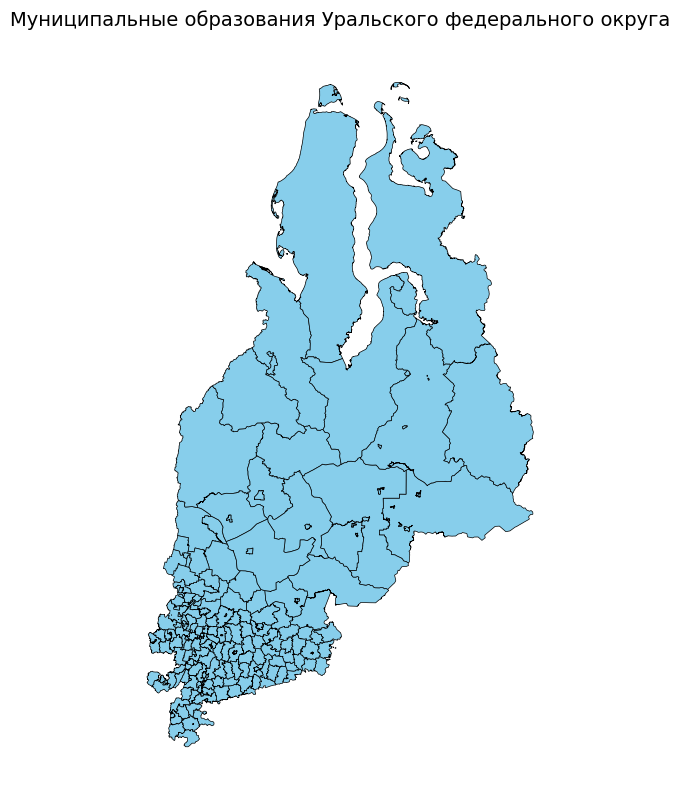

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))
muni.plot(ax=ax, color='skyblue', edgecolor='black', linewidth=0.5)

ax.set_title('Муниципальные образования Уральского федерального округа', fontsize=14)
ax.set_axis_off()  

plt.tight_layout()
plt.show()

In [4]:
population = pd.read_csv('data2/coef_b/data_Y48112007_112_v20250918.csv', sep=';')
population.head()

,indicator_section_code,indicator_section,indicator_code,indicator_name,region_id,region_name,mun_level,mun_district,municipality,oktmo,...,mun_type_oktmo,oktmo_stable,oktmo_history,oktmo_year_from,oktmo_year_to,year,indicator_value,indicator_unit,indicator_period,comment
0,31,Население,Y48112007,Общий коэффициент рождаемости,1,Алтайский край,Муниципальное образование верхнего уровня,Залесовский муниципальный округ,Залесовский муниципальный округ,1512000,...,Муниципальный округ,01512000,Изменен тип и название,2022,2025,2022,8.4,"Промилле (0,1 процента)",Значение показателя за год,CD
1,31,Население,Y48112007,Общий коэффициент рождаемости,1,Алтайский край,Муниципальное образование верхнего уровня,Залесовский муниципальный округ,Залесовский муниципальный округ,1512000,...,Муниципальный округ,01512000,Изменен тип и название,2022,2025,2023,9.0,"Промилле (0,1 процента)",Значение показателя за год,CD
2,31,Население,Y48112007,Общий коэффициент рождаемости,1,Алтайский край,Муниципальное образование верхнего уровня,Муниципальный округ город Славгород,Муниципальный округ город Славгород,1539000,...,Муниципальный округ,01539000,"Изменен тип и название, Объединение",2023,2025,2023,7.6,"Промилле (0,1 процента)",Значение показателя за год,CD
3,31,Население,Y48112007,Общий коэффициент рождаемости,1,Алтайский край,Муниципальное образование верхнего уровня,Муниципальный округ Суетский район,Муниципальный округ Суетский район,1541000,...,Муниципальный округ,01541000,Изменен тип и название,2023,2025,2023,7.2,"Промилле (0,1 процента)",Значение показателя за год,CD
4,31,Население,Y48112007,Общий коэффициент рождаемости,1,Алтайский край,Муниципальное образование верхнего уровня,Муниципальный округ Чарышский район,Муниципальный округ Чарышский район,1558000,...,Муниципальный округ,01558000,Изменен тип и название,2023,2025,2023,9.3,"Промилле (0,1 процента)",Значение показателя за год,CD


In [5]:
# Сделаем два отдельных merge и объединим с приоритетом
muni['oktmo'] = muni['oktmo'].astype(str)
population['oktmo'] = population['oktmo'].astype(str)
population['oktmo_stable'] = population['oktmo_stable'].astype(str)

merge1 = muni.merge(
    population,
    on='oktmo',
    how='left',
    suffixes=('', '_pop')
)

merge2 = muni.merge(
    population,
    left_on='oktmo',
    right_on='oktmo_stable',
    how='left',
    suffixes=('', '_pop')
)


# Объединяем оба результата
combined = pd.concat([merge1, merge2], ignore_index=True)

# Удаляем полные дубликаты (если какие-то строки полностью совпали)
final = combined.drop_duplicates()

In [6]:
muni_end = final

In [7]:
muni_end.loc[muni_end['year'] == 2015, 'natincrate2015'] = muni_end['indicator_value']
muni_end.loc[muni_end['year'] == 2020, 'natincrate2020'] = muni_end['indicator_value']

c:\Users\chizh\Desktop\Магистратура\MLOps_course\ml_env\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\chizh\Desktop\Магистратура\MLOps_course\ml_env\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


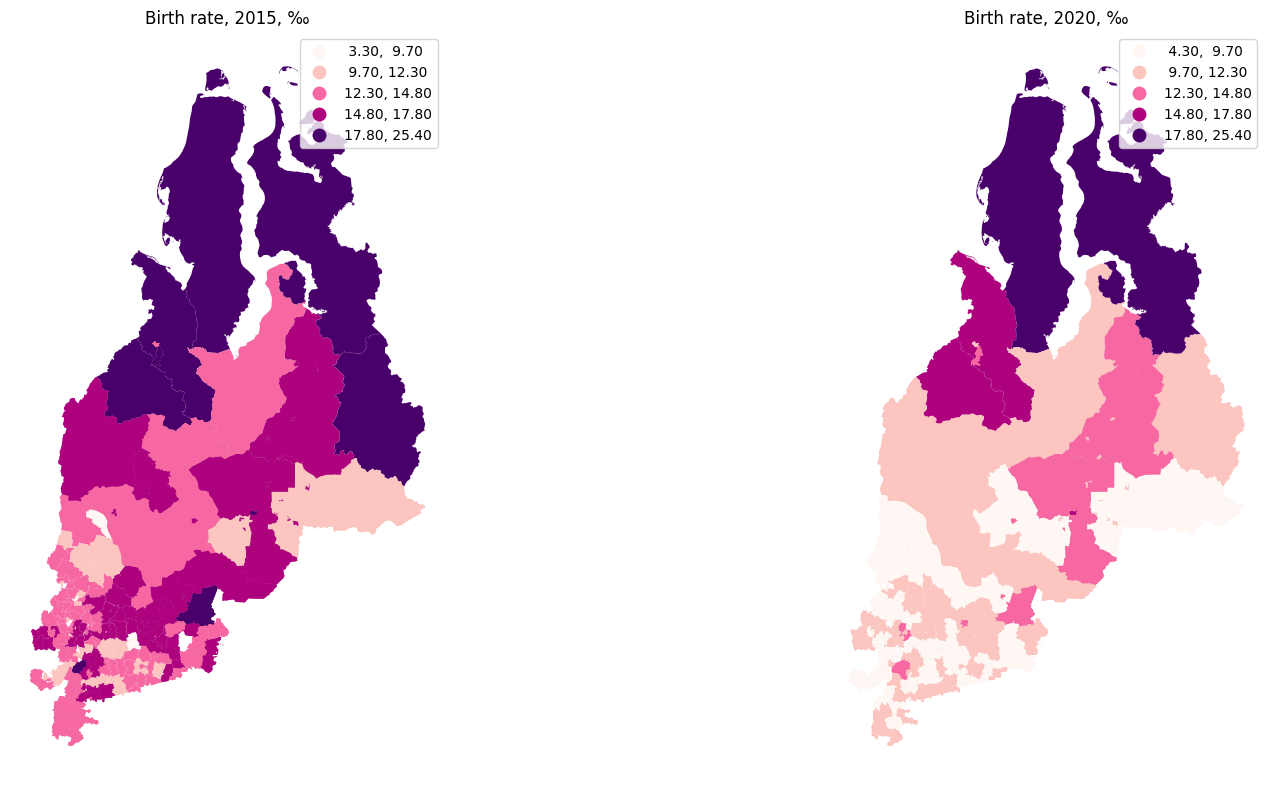

In [10]:
# Вычисляем общие интервалы на основе данных за оба года
all_values = np.concatenate([
    muni_end['natincrate2015'].dropna().values,
    muni_end['natincrate2020'].dropna().values
])

# Создаем классификатор с общими интервалами
classifier = NaturalBreaks(all_values, k=5)  # k=5 создает 5 интервалов
common_bins = classifier.bins

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

plot1 = muni_end.plot(
    column='natincrate2015',
    cmap='RdPu',
    linewidth=0.01, 
    edgecolor='0.75',
    legend=True,
    scheme="User_Defined",  # Используем пользовательские интервалы
    classification_kwds={'bins': common_bins},  # Задаем общие интервалы
    ax=ax1
)
ax1.set_title('Birth rate, 2015, ‰')
ax1.axis('off')

# 2020 год с теми же интервалами
plot2 = muni_end.plot(
    column='natincrate2020',
    cmap='RdPu',
    linewidth=0.01,
    edgecolor='0.75', 
    legend=True,
    scheme="User_Defined",  # Используем пользовательские интервалы
    classification_kwds={'bins': common_bins},  # Те же самые интервалы
    ax=ax2
)
ax2.set_title('Birth rate, 2020, ‰')
ax2.axis('off')


plt.tight_layout()
plt.savefig(fname='birth_rate.png')
plt.show()

За период с 2015 по 2020 год в Уральском федеральном округе наблюдалось общее снижение коэффициента рождаемости. При этом сохраняется устойчивая географическая дифференциация: северные территории продолжают демонстрировать наиболее высокие показатели рождаемости, тогда как южные и центральные территории, испытывают более значительное снижение, достигая в некоторых местах минимальных значений.

### Death rate

In [11]:
population = pd.read_csv('data2/coef_d/data_Y48112008_112_v20250918.csv', sep=';')

population.head()

,indicator_section_code,indicator_section,indicator_code,indicator_name,region_id,region_name,mun_level,mun_district,municipality,oktmo,...,mun_type_oktmo,oktmo_stable,oktmo_history,oktmo_year_from,oktmo_year_to,year,indicator_value,indicator_unit,indicator_period,comment
0,31,Население,Y48112008,Общий коэффициент смертности,1,Алтайский край,Муниципальное образование верхнего уровня,Залесовский муниципальный округ,Залесовский муниципальный округ,1512000,...,Муниципальный округ,01512000,Изменен тип и название,2022,2025,2022,19.4,"Промилле (0,1 процента)",Значение показателя за год,CD
1,31,Население,Y48112008,Общий коэффициент смертности,1,Алтайский край,Муниципальное образование верхнего уровня,Залесовский муниципальный округ,Залесовский муниципальный округ,1512000,...,Муниципальный округ,01512000,Изменен тип и название,2022,2025,2023,17.3,"Промилле (0,1 процента)",Значение показателя за год,CD
2,31,Население,Y48112008,Общий коэффициент смертности,1,Алтайский край,Муниципальное образование верхнего уровня,Муниципальный округ город Славгород,Муниципальный округ город Славгород,1539000,...,Муниципальный округ,01539000,"Изменен тип и название, Объединение",2023,2025,2023,13.4,"Промилле (0,1 процента)",Значение показателя за год,CD
3,31,Население,Y48112008,Общий коэффициент смертности,1,Алтайский край,Муниципальное образование верхнего уровня,Муниципальный округ Суетский район,Муниципальный округ Суетский район,1541000,...,Муниципальный округ,01541000,Изменен тип и название,2023,2025,2023,21.7,"Промилле (0,1 процента)",Значение показателя за год,CD
4,31,Население,Y48112008,Общий коэффициент смертности,1,Алтайский край,Муниципальное образование верхнего уровня,Муниципальный округ Чарышский район,Муниципальный округ Чарышский район,1558000,...,Муниципальный округ,01558000,Изменен тип и название,2023,2025,2023,18.2,"Промилле (0,1 процента)",Значение показателя за год,CD


In [ ]:
# Сделаем два отдельных merge и объединим с приоритетом
muni['oktmo'] = muni['oktmo'].astype(str)
population['oktmo'] = population['oktmo'].astype(str)
population['oktmo_stable'] = population['oktmo_stable'].astype(str)

merge1 = muni.merge(
    population,
    on='oktmo',
    how='left',
    suffixes=('', '_pop')
)

merge2 = muni.merge(
    population,
    left_on='oktmo',
    right_on='oktmo_stable',
    how='left',
    suffixes=('', '_pop')
)


# Объединяем оба результата
combined = pd.concat([merge1, merge2], ignore_index=True)

# Удаляем полные дубликаты (если какие-то строки полностью совпали)
final = combined.drop_duplicates()

print(f"Исходных строк в muni: {len(muni)}")
print(f"Строк после объединения: {len(final)}")

Исходных строк в muni: 203
Строк после объединения: 4237


In [13]:
muni_death = final

In [14]:
muni_death.loc[muni_death['year'] == 2015, 'natincrate2015'] = muni_death['indicator_value']
muni_death.loc[muni_death['year'] == 2020, 'natincrate2020'] = muni_death['indicator_value']

c:\Users\chizh\Desktop\Магистратура\MLOps_course\ml_env\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\chizh\Desktop\Магистратура\MLOps_course\ml_env\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Общие интервалы для обеих карт: [ 8.3 12.7 15.8 18.6 24.4]


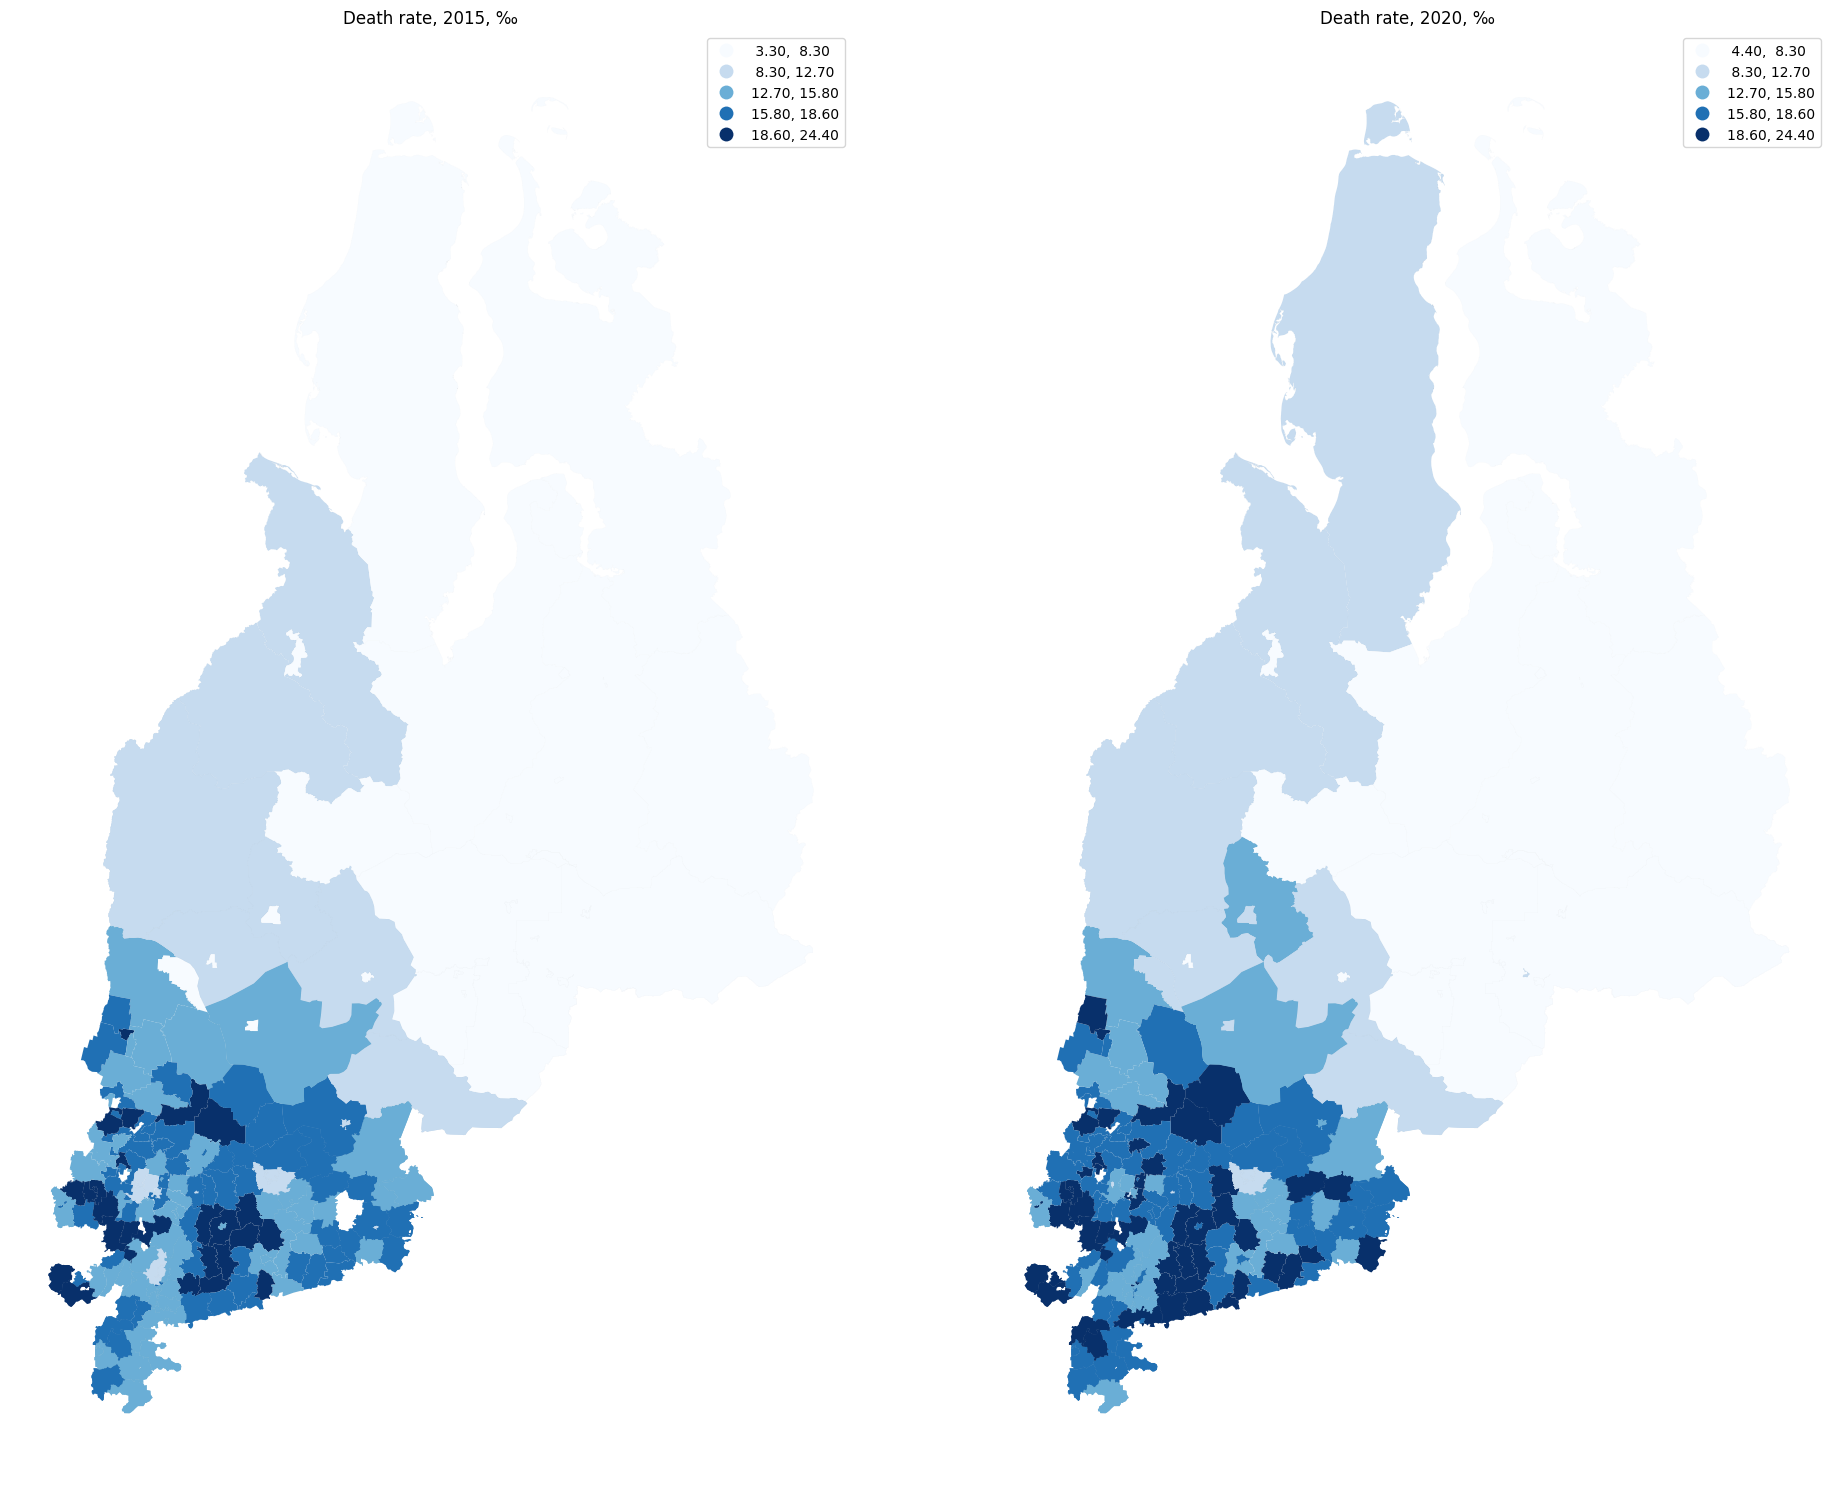

In [16]:
# Вычисляем общие интервалы на основе данных за оба года
all_values = np.concatenate([
    muni_death['natincrate2015'].dropna().values,
    muni_death['natincrate2020'].dropna().values
])

# Создаем классификатор с общими интервалами
classifier = NaturalBreaks(all_values, k=5)  # k=5 создает 5 интервалов
common_bins = classifier.bins

print("Общие интервалы для обеих карт:", common_bins)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

plot1 = muni_death.plot(
    column='natincrate2015',
    cmap='Blues',
    linewidth=0.01, 
    edgecolor='0.75',
    legend=True,
    scheme="User_Defined",  # Используем пользовательские интервалы
    classification_kwds={'bins': common_bins},  # Задаем общие интервалы
    ax=ax1
)
ax1.set_title('Death rate, 2015, ‰')
ax1.axis('off')

# 2020 год с теми же интервалами
plot2 = muni_death.plot(
    column='natincrate2020',
    cmap='Blues',
    linewidth=0.01,
    edgecolor='0.75', 
    legend=True,
    scheme="User_Defined",  # Используем пользовательские интервалы
    classification_kwds={'bins': common_bins},  # Те же самые интервалы
    ax=ax2
)
ax2.set_title('Death rate, 2020, ‰')
ax2.axis('off')

plt.tight_layout()
plt.savefig(fname='death_rate.png')
plt.show()

За период с 2015 по 2020 год в Уральском федеральном округе значительно увеличился коэффициент смертности. Это почти не касается северных районов, но касается южных, где почти везде коэффициент смертности вырос

https://storage.yandexcloud.net/tochno-st-catalog/Rosstat/data_bdmo_118_v20250918/indicators/section31/data_Y48112023_112_v20250918.zip  
data_Y48112023_year2015_112_v20250918